In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

In [12]:
attendance = pd.read_csv('K_Leauge_1_2024_Attendance.csv')
stats = pd.read_csv('Stats.csv')

In [5]:
attendance

,Matchday,Home,Away,Month,Day,Date of the week,Attendance
0,1,Ulsan HD FC,Pohang Steelers,3,1,Fri,28683
1,1,Jeonbuk Hyundai Motors,Daejeon Hana Citizen,3,1,Fri,24758
2,1,Incheon United,Suwon FC,3,2,Sat,15060
3,1,Gangwon FC,Jeju SK,3,2,Sat,6021
4,1,Gwangju FC,FC Seoul,3,2,Sat,7805
...,...,...,...,...,...,...,...
223,38,Gangwon FC,Pohang Steelers,11,23,Sat,11426
224,38,Gimcheon Sangmu,FC Seoul,11,23,Sat,5943
225,38,Daegu FC,Incheon United,11,24,Sun,11812
226,38,Daejeon Hana Citizen,Jeju SK,11,24,Sun,12743


In [13]:
stats

,Player,Month,Day,Goal,Assist
0,Son,3,2,1,0
1,Son,3,10,1,2
2,Son,3,16,0,0
3,Son,3,21,1,0
4,Son,3,26,1,0
...,...,...,...,...,...
70,Lee,10,28,0,0
71,Lee,11,3,0,0
72,Lee,11,7,0,0
73,Lee,11,10,2,1


In [18]:
attendance_sum = pd.DataFrame({'관객수':attendance.groupby(by=['Month']).sum()['Attendance']})
stats_sum = pd.DataFrame({'Goals':stats.groupby(by=['Month']).sum()['Goal'], 'Assists':stats.groupby(by=['Month']).sum()['Assist']})
stats_sum['Total_stats'] = stats_sum['Goals']+stats_sum['Assists']

Text(0.5, 1.0, '월별 관중 수 그래프')

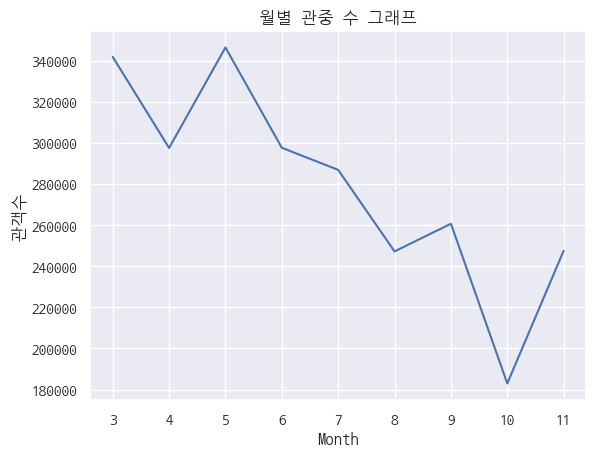

In [11]:
sns.lineplot(attendance_sum['관객수']).set_title("월별 관중 수 그래프")

Text(0.5, 1.0, '월별 스탯 그래프')

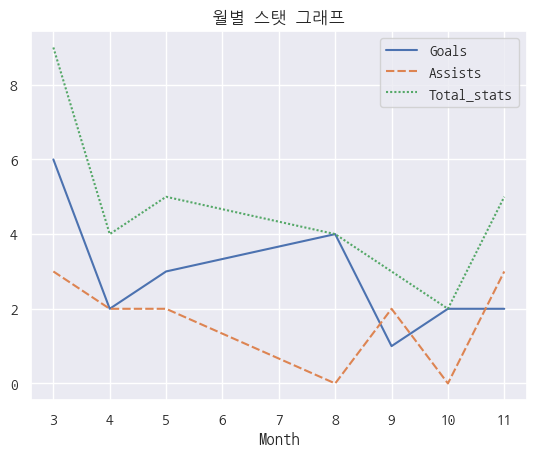

In [19]:
sns.lineplot(stats_sum).set_title("월별 스탯 그래프")

Text(0.5, 1.0, '월별 경기 수')

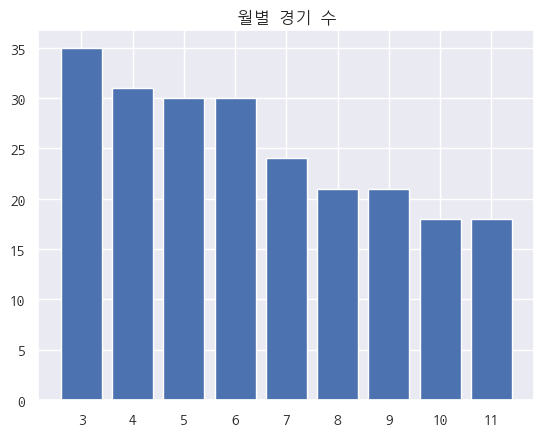

In [31]:
plt.bar(['3','4','5','6','7','8','9','10','11'], attendance['Month'].value_counts())
plt.title('월별 경기 수')

#### 언론 노출도를 고려해 유명선수들의 스탯만 수집
손흥민, 황희찬, 이강인 선수의 데이터를 수집
김민재도 인지도는 충분하나 수비수 특성 상 스탯비교가 힘들 것 같아 제외

#### 고려할 점
6월부터 8월까지는 유럽 축구가 휴식기에 돌입하므로 이점을 고려해서 봐야할 것 같음
어떤 팀들간의 경기가 펼쳐지는지도 매우 중요
경기장마다 수용인원이 다르기때문에 어느 경기장에서 경기가 펼쳐지는지도 중요(같은 매치업이라도 경기장에 따라 인원수의 차이가 극명하게 날 수 있음)

관중 수 그래프를 보니 3월과 5월에 가장 많은 관중이 몰림
그리고 선수들의 스탯도 3월과 5월, 11월이 가장 좋음

3월은 개막시즌이기도 하고 울산vs포항, 서울vs인천, 울산vs전북 등 인기팀들의 더비매치가 많음

5월 4일 서울vs울산 경기 52,000명 관람

6,7,8월에는 K리그의 관중 동원력이 급속하게 떨어짐

10월에는 K리그에서 가장 관중 동원력이 좋은 팀인 FC서울의 홈경기가 한 경기도 없음

월별 경기수를 보니 후반으로 갈 수록 경기수가 적어지는 점도 고려해야할 것 같음
